## Front Matter

**TITLE GOES HERE**

CASA0013 - Introduction to Programming for Spatial Analysts

Student ID: 20170567

Word Count - 

## Executive Summary

London is changing. But this isn't new. London has survived Romans, Anglo-Saxons, Normans, Tudors, Stuarts, fires, plagues, the Blitz, Conservative Governments, Labour governments and everything else in between. One thing has always remained constant though London is and has been a global city open for business. The number two global city after New York according to Kearney in fact (“Read @Kearney,” n.d.).

As ever before, London will survive Brexit, and London will survive COVID. But what's survival, and what does 2021 and beyond look like?

This report sets out to explain some of the potential opportunities and the potential risks for your company's Airbnb and housing investments across  London. It'll focus on making sense and taking advantage of all the uncertainty and churn caused by COVID, Brexit and the plethora of other things that make the world spin and causes money to change hands.

The paper is going to focus on three main questions:

1. What happened to London's Airbnb market in 2020?
2. What happened to London's property market in 2020?
3. What should you do in 2021 to take advantage of this?

**If nothing else you should remember...**

- **Tourism crashed in London in 2020:** For reasons that are obvious to everyone, London had fewer tourists in 2020. According to Visit Britain, June 2020 had 95% fewer visitors than the same point in 2019 (“Latest monthly data,” 2018). While Airbnb had 8,000, or about 9.5%, fewer listings on the site when comparing November 2020 to November 2019 (“Get the Data - Inside Airbnb. Adding data to the debate.,” n.d.). In comparison, hotel revenue per room dropped to 22% of its 2019 value of £129 to £29 in 2020 (Jolly, 2020). Could Airbnb properties be more resilient than hotels?

- **Renters fled London:** While the tourism industry was undoubtedly hurt during 2020, landlords were no better off. There were nearly 11,000 fewer properties, almost 21%, being rented across the city compared to the previous year (“Private rental market summary statistics in England - Office for National Statistics,” n.d.). Renters don't appear to have fled back to other parts of the country as the national number went down by 15% as well.

- **It can't all be bad news... but you might already be late:** Property prices have already reached pre-COVID levels after a brief lull during the first lockdown when the market was shut. The government's stamp duty holiday and all-time low-interest rates have seen a rush of property buying with sales new agreed up 52.7% in October 2020 over the previous year (Lawford, 2020). Cash buyers are also up across the capital, nearly reaching their pre-COVID numbers. As mentioned, mortgage buyers and other investors are already taking advantage of all time low-interest rates (“Bank Rate history and data | Bank of England Database,” n.d.). To many, the time to invest seems to be now... or maybe last month.

# Reproducible Code

In [233]:
#Loading the appropriate modules

import os
import numpy as np
import pandas as pd
import geopandas as gpd
import seaborn as sns

import re
import sklearn

import matplotlib.cm as cm
import matplotlib.pyplot as plt

from pandas import read_csv
import folium
import webbrowser

from IPython.display import display_markdown

def as_markdown(head='', body='Some body text'):
    if head is not '':
        display_markdown(f"##### {head}\n\n>{body}\n", raw=True)
    else:
        display_markdown(f">{body}\n", raw=True)

In [234]:
#Getting the columns I need from the InsideAirbnb data

cols = ['id', 'name', 'description', 'host_id', 'host_name', 'host_since', 'host_listings_count', 'host_total_listings_count', 
       'neighbourhood_cleansed', 'latitude', 'longitude', 'property_type', 'room_type', 'accommodates', 'bedrooms', 'price',
       'minimum_nights', 'maximum_nights', 'maximum_nights']

In [235]:
#Loading in the London boroughs package from the coursework

boros = gpd.read_file('https://github.com/jreades/i2p/blob/master/data/src/Boroughs.gpkg?raw=true')

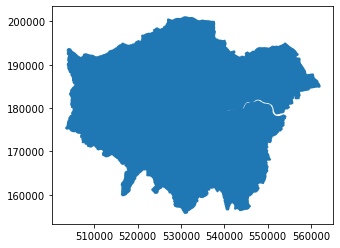

In [236]:
#London Geometry - might not be needed

ldn = gpd.GeoDataFrame(gpd.GeoSeries(data=boros.unary_union, crs='epsg:27700')).rename(columns={0:'original'})

# In order to ensure that we get all MSOAs _within_ London 
# we will buffer the boundary by 250m. If _cover_ were 
# easier to use then that option might be preferable.
ldn['geometry'] = ldn.original.buffer(250)
ldn = ldn.set_geometry('geometry')
ldn.plot();

In [237]:
#making a London boroughs gdf - might not be needed
ldn_boros = gpd.sjoin(boros, ldn, op='within')

In [238]:
#Getting the Airbnb links for 2019 and 2020 - cleaning happens in the cells below and creating geodataframes

url2019 = "http://data.insideairbnb.com/united-kingdom/england/london/2019-11-05/data/listings.csv.gz"
url2020 = "http://data.insideairbnb.com/united-kingdom/england/london/2020-11-06/data/listings.csv.gz"

In [239]:
df2019 = pd.read_csv(url2019, usecols = cols, low_memory = False)

In [240]:
df2020 = pd.read_csv(url2020, usecols = cols, low_memory = False)

In [136]:
df2019['price'] = df2019.price.str.replace('$','').str.replace(',','').astype(float)

In [137]:
df2020['price'] = df2020.price.str.replace('$','').str.replace(',','').astype(float)

In [138]:
df2019.drop(df2019[((df2019.latitude.isna())|(df2019.longitude.isna()))].index, axis=0, inplace=True)
df2019.drop(df2019[((df2019.latitude < 40)|(df2019.longitude > 1))].index, axis=0, inplace=True)
print(df2019.shape)

(85068, 18)


In [139]:
df2020.drop(df2020[((df2020.latitude.isna())|(df2020.longitude.isna()))].index, axis=0, inplace=True)
df2020.drop(df2020[((df2020.latitude < 40)|(df2020.longitude > 1))].index, axis=0, inplace=True)
print(df2020.shape)

(76984, 18)


In [140]:
gdf2019 = gpd.GeoDataFrame(df2019, geometry=gpd.points_from_xy(df2019.longitude, df2019.latitude, crs='epsg:4326'))
gdf2019 = gdf2019.to_crs('epsg:27700')

In [141]:
gdf2020 = gpd.GeoDataFrame(df2020, geometry=gpd.points_from_xy(df2020.longitude, df2020.latitude, crs='epsg:4326'))
gdf2020 = gdf2020.to_crs('epsg:27700')

In [142]:
gdf2019_la = gpd.sjoin(gdf2019, boros, op='within', how='left')
print(gdf2019_la.columns.values)

['id' 'name' 'description' 'host_id' 'host_name' 'host_since'
 'host_listings_count' 'host_total_listings_count'
 'neighbourhood_cleansed' 'latitude' 'longitude' 'property_type'
 'room_type' 'accommodates' 'bedrooms' 'price' 'minimum_nights'
 'maximum_nights' 'geometry' 'index_right' 'NAME' 'GSS_CODE' 'HECTARES'
 'NONLD_AREA' 'ONS_INNER']


In [143]:
gdf2020_la = gpd.sjoin(gdf2020, boros, op='within', how='left')
print(gdf2020_la.columns.values)

['id' 'name' 'description' 'host_id' 'host_name' 'host_since'
 'host_listings_count' 'host_total_listings_count'
 'neighbourhood_cleansed' 'latitude' 'longitude' 'property_type'
 'room_type' 'accommodates' 'bedrooms' 'price' 'minimum_nights'
 'maximum_nights' 'geometry' 'index_right' 'NAME' 'GSS_CODE' 'HECTARES'
 'NONLD_AREA' 'ONS_INNER']


In [144]:
gdf2019_la.drop(columns=['index_right','HECTARES','NONLD_AREA','ONS_INNER'], inplace=True)
gdf2019_la.NAME.unique()

array(['Lambeth', 'Croydon', 'Islington', 'Tower Hamlets',
       'Kensington and Chelsea', 'Westminster', 'Wandsworth',
       'Hammersmith and Fulham', 'Merton', 'Haringey', 'Southwark',
       'Barnet', 'Hounslow', 'Camden', 'Richmond upon Thames', 'Brent',
       'Hackney', 'Waltham Forest', 'Ealing', 'Newham', 'Lewisham',
       'Enfield', 'City of London', 'Bromley', 'Havering', 'Greenwich',
       'Barking and Dagenham', 'Harrow', 'Hillingdon', 'Redbridge',
       'Kingston upon Thames', 'Bexley', 'Sutton', nan], dtype=object)

In [145]:
gdf2020_la.drop(columns=['index_right','HECTARES','NONLD_AREA','ONS_INNER'], inplace=True)
gdf2020_la.NAME.unique()

array(['Lambeth', 'Islington', 'Kensington and Chelsea', 'Westminster',
       'Hammersmith and Fulham', 'Barnet', 'Hounslow',
       'Richmond upon Thames', 'Haringey', 'Hackney', 'Southwark',
       'Croydon', 'Tower Hamlets', 'Waltham Forest', 'Brent', 'Camden',
       'Newham', 'Redbridge', 'Merton', 'Lewisham', 'Wandsworth',
       'Bromley', 'Havering', 'Greenwich', 'Ealing', 'Enfield',
       'Barking and Dagenham', 'Hillingdon', 'Harrow',
       'Kingston upon Thames', 'Bexley', 'City of London', 'Sutton', nan],
      dtype=object)

In [146]:
gdf2019[gdf2019_la.NAME.isna()][['id','name']]

,id,name
85009,39417205,Room in detached house on private rd near airport
85016,39631666,Double bedroom: easy commute to central London
85022,38994843,Riverside Modern flat
85023,39382246,Large studio flat close to Heathrow airport
85025,39659760,MODERN & BRIGHT ROOM in a PENTHOUSE - central LDN
85026,39485224,Single room
85027,39690755,Private Room in Borehamwood Cozy 3bedroom House
85035,39377815,LIMETERRACE
85036,39284619,Elegant home with million-worth LondonSkyline ...
85038,39740287,4 bed fam-friendly close Tower Brid in Bermondsey


In [147]:
gdf2020[gdf2020_la.NAME.isna()][['id','name']]

,id,name
20310,15863189,Newly furnished bedrooms
25675,19027695,"GOOD PRICE: quiet rooms near Epsom, Kingston"
27120,19723786,Large room in easy going house
46758,31137908,3 BR home in lovely setting by the river by Veeve
46987,31312542,Fully private spacious acommodation - 4 guests
49572,33003389,Chic & modern 1BR riverside apartment in Fulham
54964,36168656,Unique 3BR with balcony and River Views (Veeve)
75833,45854684,Luxury away
75861,45861637,"Stylish & Bright 2BDR Apt, Residential Area Fu..."
75929,45878915,"Peaceful, cosy room"


In [148]:
gdf2019_la.drop(index=gdf2019[gdf2019_la.NAME.isna()].index, axis=1, inplace=True)
print(gdf2019_la.shape)

(85055, 21)


In [149]:
gdf2020_la.drop(index=gdf2020[gdf2020_la.NAME.isna()].index, axis=1, inplace=True)
print(gdf2020_la.shape)

(76966, 21)


In [225]:
listingsdiff = gdf2019_la['latitude'].count() - gdf2020_la['latitude'].count()

In [226]:
listingsdiff

8089

In [228]:
(listingsdiff / gdf2019_la['latitude'].count()) * 100

9.510316853800482

In [150]:
#Filtering for entire home/apt - focus of briefing
gdf2020_la_entire_prop = gdf2020_la[gdf2020_la['room_type'] == 'Entire home/apt']

In [151]:
print(gdf2020_la_entire_prop.shape)

(42201, 21)


In [191]:
#Looking at a borough level
gdf2020grouped_entire = gdf2020_la_entire_prop.groupby('NAME').agg({'price':['median', 'count']}).reset_index()

In [192]:
gdf2019_la_entire = gdf2019_la[gdf2019_la['room_type'] == 'Entire home/apt']

In [193]:
gdf2019grouped_entire = gdf2019_la_entire.groupby('NAME').agg({'price':['median', 'count']}).reset_index()

In [194]:
print(gdf2019grouped_entire.shape)

(33, 3)


In [195]:
gdf2019grouped_entire.columns = gdf2019grouped_entire.columns.get_level_values(1)

In [196]:
gdf2019grouped_entire['count'].sum()

47439

In [197]:
gdf2020grouped_entire.columns = gdf2020grouped_entire.columns.get_level_values(1)

In [198]:
gdf2020grouped_entire['count'].sum()

42201

In [199]:
gdf2019grouped_entire.rename(columns={'':'NAME', 'count':'listings'}, inplace=True)

In [200]:
gdf2020grouped_entire.rename(columns={'':'NAME', 'count':'listings'}, inplace=True)

In [201]:
rejoined_gdf2019 = gdf2019grouped_entire.set_index('NAME').join(
                boros.set_index('NAME'), 
                rsuffix='_r')

In [202]:
rejoined_gdf2020 = gdf2020grouped_entire.set_index('NAME').join(
                boros.set_index('NAME'), 
                rsuffix='_r')

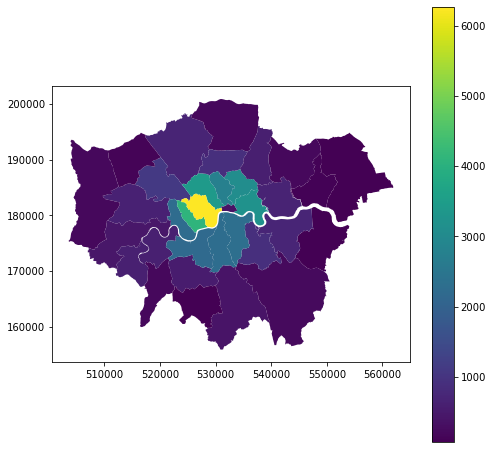

In [203]:
rejoined_gdf2020 = rejoined_gdf2020.set_geometry('geometry')
rejoined_gdf2020.plot(column='listings', legend=True, figsize=(8,8));

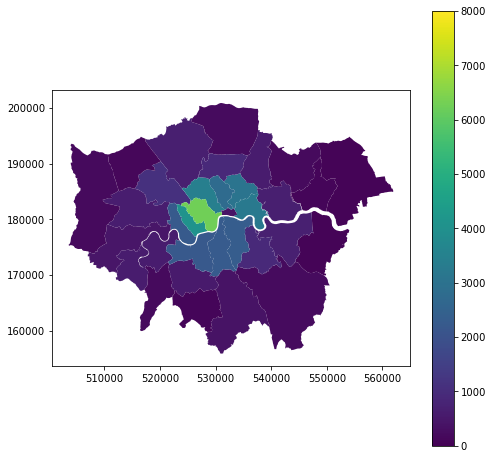

In [204]:
vmin, vmax = 0, 8000
ax = rejoined_gdf2020.plot(column='listings', legend=True, figsize=(8,8), vmin=vmin, vmax=vmax)

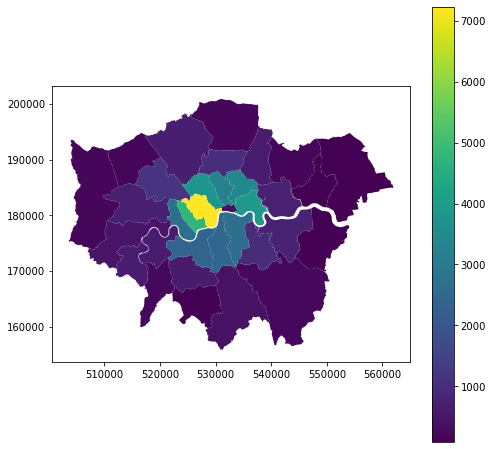

In [205]:
rejoined_gdf2019 = rejoined_gdf2019.set_geometry('geometry')
rejoined_gdf2019.plot(column='listings', legend=True, figsize=(8,8));

In [206]:
rejoined_gdf2019

,median,listings,GSS_CODE,HECTARES,NONLD_AREA,ONS_INNER,geometry
NAME,,,,,,,
Barking and Dagenham,80.0,112,E09000002,3779.934,169.150,F,"MULTIPOLYGON (((543905.400 183199.100, 543905...."
Barnet,99.0,699,E09000003,8674.837,0.000,F,"MULTIPOLYGON (((524579.900 198355.200, 524594...."
Bexley,87.5,88,E09000004,6428.649,370.619,F,"MULTIPOLYGON (((547226.200 181299.300, 547320...."
Brent,100.0,1160,E09000005,4323.270,0.000,F,"MULTIPOLYGON (((525201.000 182512.600, 525181...."
Bromley,84.5,242,E09000006,15013.487,0.000,F,"MULTIPOLYGON (((540373.600 157530.400, 540361...."
Camden,135.0,3852,E09000007,2178.932,0.000,T,"MULTIPOLYGON (((528840.200 187217.800, 528834...."
City of London,151.0,388,E09000001,314.942,24.546,T,"MULTIPOLYGON (((531145.100 180782.100, 531143...."
Croydon,80.0,406,E09000008,8649.441,0.000,F,"MULTIPOLYGON (((535009.200 159504.700, 535005...."
Ealing,100.0,726,E09000009,5554.428,0.000,F,"MULTIPOLYGON (((510253.500 182881.600, 510249...."


In [207]:
rejoined_gdf2019['listings'].sum()

47439

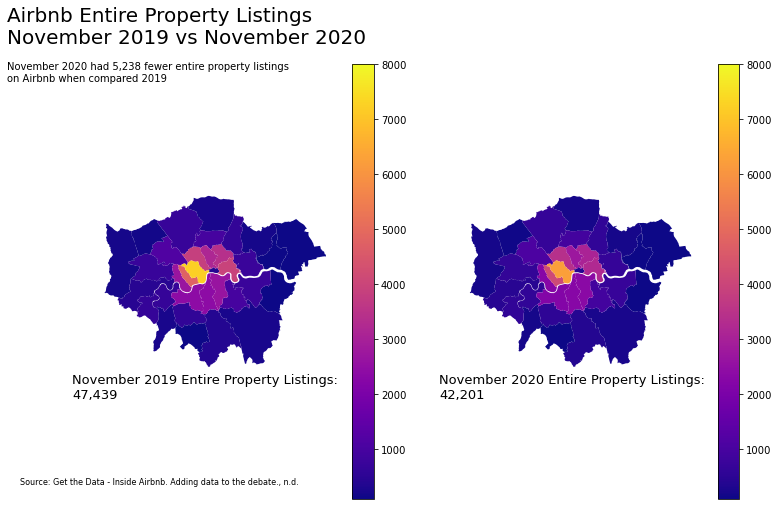

In [208]:
vmin, vmax = 100, 8000

f,axes = plt.subplots(1,2,figsize=(12,8))

rejoined_gdf2019.plot(column='listings', ax=axes[0], legend=True, cmap='plasma', vmin=vmin, vmax=vmax)
rejoined_gdf2020.copy().plot(column='listings', ax=axes[1], legend=True, cmap='plasma', vmin=vmin,vmax=vmax)
for ax in axes:
    ax.axis('off')
    
f.suptitle('Airbnb Entire Property Listings \nNovember 2019 vs November 2020', x=0.025, ha='left', size=20)
plt.figtext(x=0.1, y=0.3, s=f"November 2019 Entire Property Listings:\n{rejoined_gdf2019.listings.sum():,.0f}", size=13)
plt.figtext(x=0.525, y=0.3, s=f"November 2020 Entire Property Listings:\n{rejoined_gdf2020.listings.sum():,.0f}", size=13)
plt.figtext(x=0.025, y=0.85, s=f"November 2020 had {rejoined_gdf2019.listings.sum() - rejoined_gdf2020.listings.sum():,.0f} fewer entire property listings \non Airbnb when compared 2019", size=10)
plt.figtext(x=0.04, y = 0.15, s = 'Source: Get the Data - Inside Airbnb. Adding data to the debate., n.d.', size =8)

plt.savefig('test1.png', bbox_inches='tight')

In [37]:
rent2020 = "https://raw.githubusercontent.com/darennie/i2p/main/realassignment/rent2020.csv"
rent2019 = "https://raw.githubusercontent.com/darennie/i2p/main/realassignment/rent2019.csv"

In [38]:
dfrent2019 = pd.read_csv(rent2019, low_memory = False, error_bad_lines=False)
dfrent2019.insert(0, 'Year', '2019')
print(dfrent2019.shape)

(33, 7)


In [39]:
dfrent2020 = pd.read_csv(rent2020, low_memory = False, error_bad_lines=False)
dfrent2020.insert(0, 'Year', '2020')
print(dfrent2020.shape)

(33, 7)


In [40]:
dfrentmerged = pd.merge(dfrent2019, dfrent2020, on = "Borough")

In [41]:
dfrentmerged = dfrentmerged.rename(columns={'Count of rents2019': 'rentcount2019','Count of rents 2020' : 'rentcount2020', 'Borough' : 'NAME'})

In [42]:
dfrentmerged = dfrentmerged.drop(columns=['Year_x'])

In [43]:
gdfrentsmerged_boros = boros.merge(dfrentmerged, on='NAME')

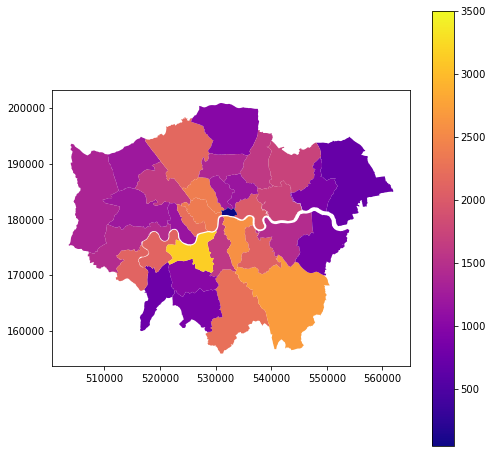

In [44]:
gdfrentsmerged_boros = gdfrentsmerged_boros.set_geometry('geometry')

vmin, vmax = 50, 3500
ax = gdfrentsmerged_boros.plot(column='rentcount2019', legend=True, figsize=(8,8), vmin=vmin, vmax=vmax, cmap='plasma')

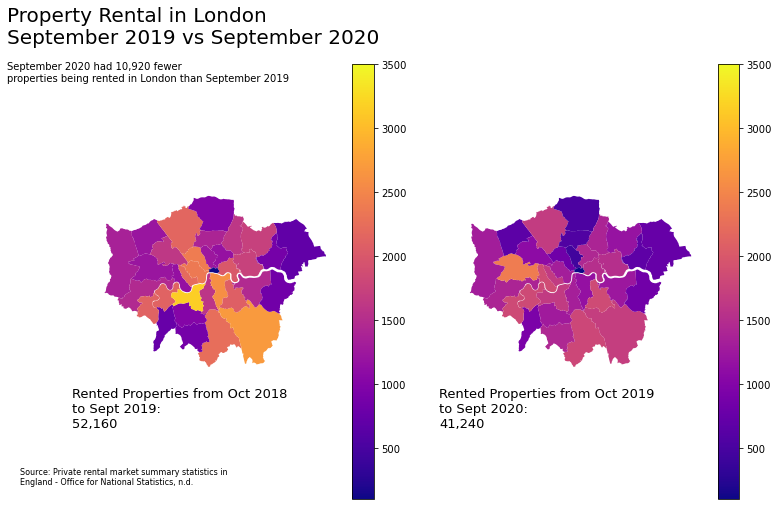

In [82]:
vmin, vmax = 100, 3500

f,axes = plt.subplots(1,2,figsize=(12,8))

gdfrentsmerged_boros.plot(column='rentcount2019', ax=axes[0], legend=True, cmap='plasma', vmin=vmin, vmax=vmax)
gdfrentsmerged_boros.copy().plot(column='rentcount2020', ax=axes[1], legend=True, cmap='plasma', vmin=vmin,vmax=vmax)
for ax in axes:
    ax.axis('off')
    
f.suptitle('Property Rental in London \nSeptember 2019 vs September 2020', x=0.025, ha='left', size=20)
plt.figtext(x=0.1, y=0.25, s=f"Rented Properties from Oct 2018\nto Sept 2019:\n{gdfrentsmerged_boros.rentcount2019.sum():,.0f}", size=13)
plt.figtext(x=0.525, y=0.25, s=f"Rented Properties from Oct 2019\nto Sept 2020:\n{gdfrentsmerged_boros.rentcount2020.sum():,.0f}", size=13)
plt.figtext(x=0.025, y=0.85, s=f"September 2020 had {gdfrentsmerged_boros.rentcount2019.sum() - gdfrentsmerged_boros.rentcount2020.sum():,.0f} fewer \nproperties being rented in London than September 2019", size=10)
plt.figtext(x=0.04, y = 0.15, s = 'Source: Private rental market summary statistics in \nEngland - Office for National Statistics, n.d.', size =8)

plt.savefig('test.png', bbox_inches='tight')

In [46]:
rejoined_gdf2019v2 = rejoined_gdf2019.add_suffix('_2019')

In [47]:
rejoined_gdf2020v2 = rejoined_gdf2020.add_suffix('_2020')

In [48]:
gdfairbnbmerged = pd.merge(rejoined_gdf2019v2, rejoined_gdf2020v2, on = "NAME")

In [49]:
gdfairbnbmerged.dtypes

median_2019         float64
listings_2019         int64
GSS_CODE_2019        object
HECTARES_2019       float64
NONLD_AREA_2019     float64
ONS_INNER_2019       object
geometry_2019      geometry
median_2020         float64
listings_2020         int64
GSS_CODE_2020        object
HECTARES_2020       float64
NONLD_AREA_2020     float64
ONS_INNER_2020       object
geometry_2020      geometry
dtype: object

In [50]:
gdfairbnbmerged = gdfairbnbmerged.drop(columns=['GSS_CODE_2019', 'NONLD_AREA_2019', 'ONS_INNER_2019',
                                               'geometry_2019', 'GSS_CODE_2020', 'HECTARES_2019', 'GSS_CODE_2020',
                                               'HECTARES_2020', 'NONLD_AREA_2020', 'ONS_INNER_2020'])

In [51]:
gdfrentsmerged_boros = gdfrentsmerged_boros.drop(columns=['HECTARES', 'NONLD_AREA', 'ONS_INNER'])

In [52]:
gdfcompletedataset = pd.merge(gdfrentsmerged_boros, gdfairbnbmerged, on = "NAME")

In [53]:
gdfcompletedataset['rentdifferenceabsolute'] = (gdfcompletedataset['rentcount2020'] - gdfcompletedataset['rentcount2019'])


In [54]:
gdfcompletedataset['rentdifferenceproportional'] = (gdfcompletedataset['rentdifferenceabsolute'] / gdfcompletedataset['rentcount2019'] * 100)

In [55]:
gdfcompletedataset['listingsdifferenceabsolute'] = (gdfcompletedataset['listings_2020'] - gdfcompletedataset['listings_2019'])

In [56]:
gdfcompletedataset['listingsdifferenceproportional'] = (gdfcompletedataset['listingsdifferenceabsolute'] / gdfcompletedataset['listings_2019'] * 100)

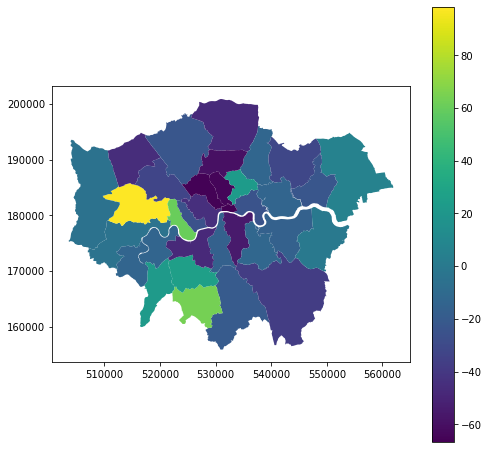

In [57]:
gdfcompletedataset.plot(column='rentdifferenceproportional', legend=True, figsize=(8,8));

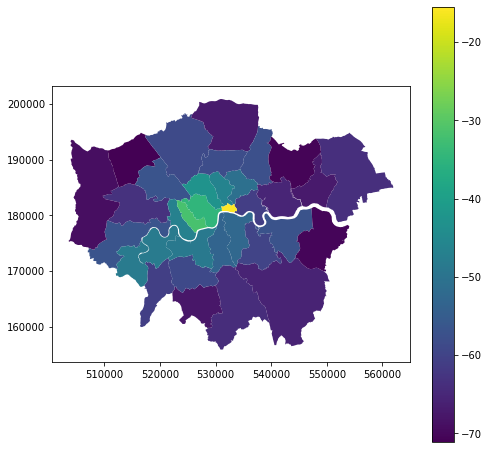

In [58]:
gdfcompletedataset.plot(column='listingsdifferenceproportional', legend=True, figsize=(8,8));

In [59]:
housebuying = 'https://landregistry.data.gov.uk/app/ukhpi/download/new.csv?from=2019-01-01&to=2021-01-01&location=http%3A%2F%2Flandregistry.data.gov.uk%2Fid%2Fregion%2Flondon'

In [84]:
dfhouse = pd.read_csv(housebuying, low_memory = False)

In [87]:
dfhouse = dfhouse.dropna()

In [88]:
dfhouse = dfhouse.rename(columns={'Period' : 'Monthly Period', 'Sales volume' : 'Normalised Monthly Sales Volume',
                                 'Average price All property types' : 'Normalised Average Sales Price',
                                 'Percentage change (monthly) All property types' : 'Normalised Monthly Percentage Change in Property Sales',
                                 'Percentage change (monthly) Cash purchases' : 'Normalised Monthly Percentage Change in Cash Purchase Property Sales',
                                 'Percentage change (yearly) Flats and maisonettes' : 'Normalised Monthly Percent Change in Flat Purchases'})


In [89]:
from sklearn.preprocessing import minmax_scale

In [90]:
dfhouse[['Normalised Monthly Sales Volume', 'Normalised Average Sales Price', 'Normalised Monthly Percentage Change in Property Sales', 'Normalised Monthly Percentage Change in Cash Purchase Property Sales', 'Normalised Monthly Percent Change in Flat Purchases']] = minmax_scale(dfhouse[['Normalised Monthly Sales Volume', 'Normalised Average Sales Price', 'Normalised Monthly Percentage Change in Property Sales', 'Normalised Monthly Percentage Change in Cash Purchase Property Sales', 'Normalised Monthly Percent Change in Flat Purchases']])

In [91]:
dfhousemaxmin = dfhouse[['Monthly Period', 'Normalised Monthly Sales Volume', 'Normalised Average Sales Price', 'Normalised Monthly Percentage Change in Property Sales', 'Normalised Monthly Percentage Change in Cash Purchase Property Sales', 'Normalised Monthly Percent Change in Flat Purchases']]

In [92]:
dfhouse_melted = dfhousemaxmin.melt("Monthly Period",var_name="Housing Market Indicator",value_name="Normalised Value")

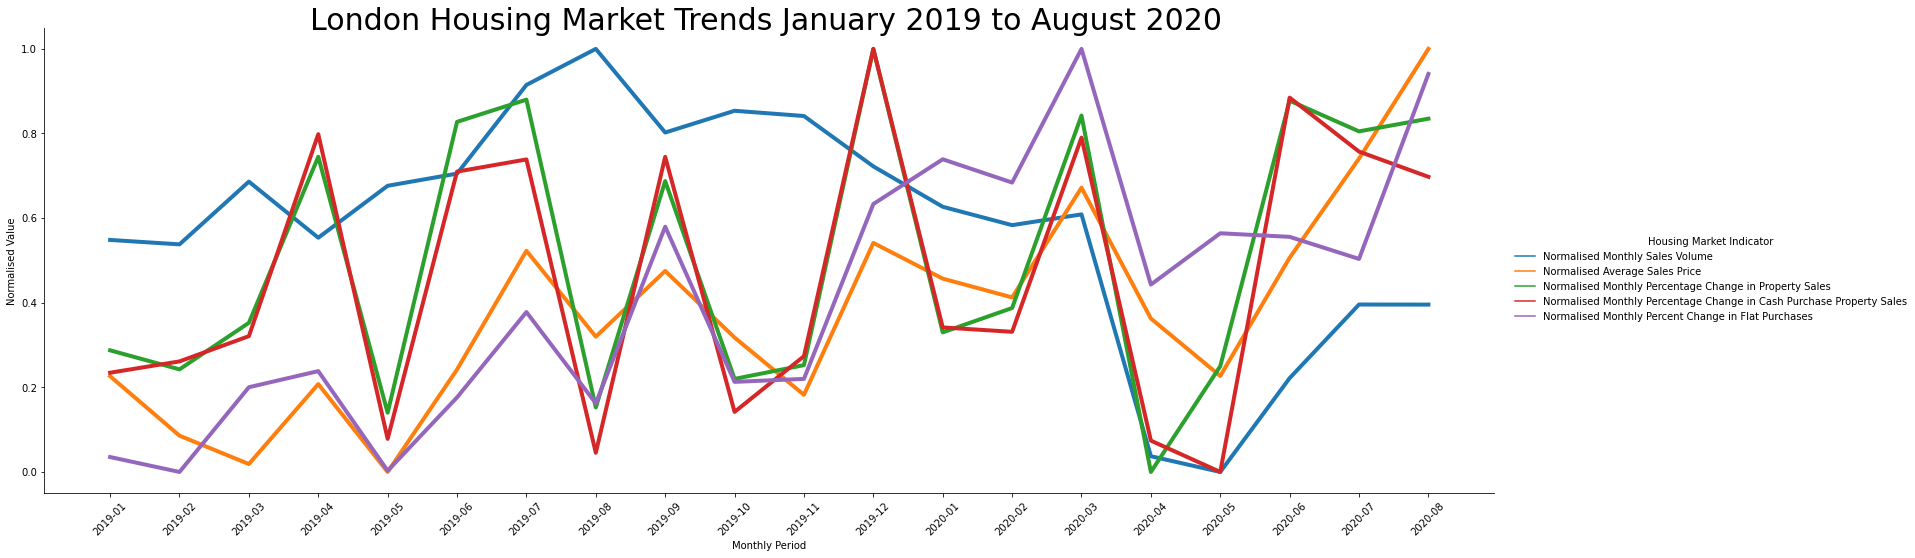

In [115]:

g = sns.relplot(data=dfhouse_melted, x="Monthly Period", y="Normalised Value", hue="Housing Market Indicator",kind="line",
           height = 7, linewidth = 4, aspect = 3)
g.set_xticklabels(rotation=45)
g.fig.suptitle('London Housing Market Trends January 2019 to August 2020', fontsize = 30, x=0.4, y=1.02)
#g.fig.suptitle('Source: UK House Price Index, n.d.', fontsize =10, x=0.7, y =0.1)

plt.savefig('test2.png', bbox_inches='tight')

# Executive Briefing